In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
yolo=cv2.dnn.readNet("./yolo/yolov3.weights","./yolo/yolov3.cfg")

In [3]:
classes=[]
with open("./yolo/coco.names",'r') as f:
    classes=f.read().splitlines()


In [4]:
len(classes)

80

In [5]:
img=cv2.imread('./images/dog.jpg')
blob=cv2.dnn.blobFromImage(img, 1/255,(320,320),(0,0,0),swapRB=True,crop=False)

In [6]:
blob.shape

(1, 3, 320, 320)

In [13]:
yolo.setInput(blob)

In [14]:
output_layer_name=yolo.getUnconnectedOutLayersNames()

In [15]:
layeroutput=yolo.forward(output_layer_name)

In [16]:
boxes=[]
confidences=[]
class_ids=[]
for output in layeroutput:
    for detection in output:
        score=detection[:5]
        class_id=np.argmax(score)
        confidence=score[class_id]
        if confidence>0.7:
            center_x= int(detection[0]*width)
            center_y=int(detection[0]*height)
            w=int(detection[0]*width)
            h=int(detection[0]*height)
            x=int(center_x- w/2)
            y=int(center_y -h/2)
            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

NameError: name 'width' is not defined

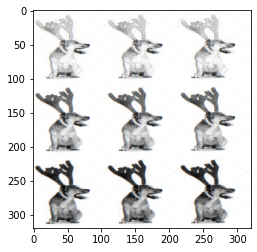

In [12]:
i=blob[0].reshape(320,320,3)
plt.imshow(i)